In [ ]:
import numpy as np
def to_pyoung (x):
  y = x * 0.3025
  return np.round(y)

In [ ]:
to_pyoung(106)

32.0

In [ ]:
M2 = np.array([60,80,93,106,119], dtype=float)
Pyoung = np.array([18,24,28,32,36], dtype=float)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=1, input_shape=[1]))

In [ ]:
model = Sequential([
                    Dense(units=1, input_shape=[1])
                    ])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [ ]:
history = model.fit(M2, Pyoung, epochs=5000, verbose=0)

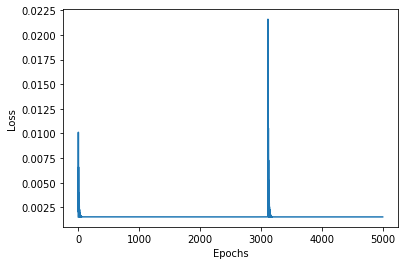

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.show()

In [ ]:
print(model.predict([135.0]))

[[40.85305]]


In [ ]:
print(model.predict([199.0]))

[[60.396717]]


In [ ]:
print("모델의 가중치: {}".format(model.get_weights()))

모델의 가중치: [array([[0.3053698]], dtype=float32), array([-0.37187165], dtype=float32)]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_labels.shape, train_labels.shape

((60000,), (60000,))

In [ ]:
train_labels, test_labels

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

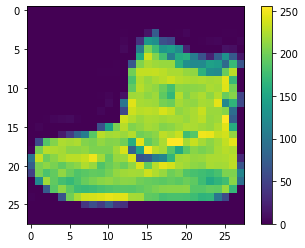

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
print(train_labels[0])

9


In [ ]:
# 정규화 작업 ---- 0과 1사이의 값으로 설정하는 것
train_images = train_images /255
test_images = test_images /255

In [ ]:
model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(128, activation='relu'), 
                    Dense(10, activation='softmax')
                    ])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuarcy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%history = model.fit(train_images, train_labels, epochs=10, validation_split=0.25)

KeyError: ignored

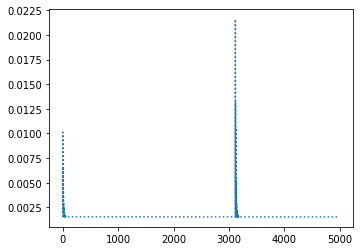

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], linestyle = ":", label='loss')
plt.plot(history.history['val_loss'], linestyle = "--", label='val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuarcy'], linestyle = ":", label='accuracy')
plt.plot(history.history['val_accuracy'], linestyle = "--", label='val_accuracy')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(x_train.shape, x_test.reshape)

(60000, 28, 28, 1) <built-in method reshape of numpy.ndarray object at 0x7ff6e114d350>


In [ ]:
model = Sequential([
                    Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
model.compile(optimizer='adam',
              metrics=['accuarcy'])

In [ ]:
checkpoint_path = 'my_checkpoint.ckpt'

checkpoint = ModelCheckpoint(checkpoint_path,
                             save_best_only=True,
                             save_weights_only=True,
                             monitor='val_loss',
                             verbose=1)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=20, batch_size=200, verbose=0,
                    callbacks=[checkpoint]
                    )

ValueError: ignored